# アルピコホールディングス ５分足

In [37]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import re
import yfinance as yf

pattern = re.compile(r'(.+)\.T')

symbol = '297A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='5m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-25 09:05:00+09:00,201.0,205.0,197.0,201.0,1055700,0.0,0.0
2024-12-25 09:10:00+09:00,200.0,202.0,194.0,195.0,1198800,0.0,0.0
2024-12-25 09:15:00+09:00,195.0,195.0,193.0,194.0,435700,0.0,0.0
2024-12-25 09:20:00+09:00,194.0,197.0,193.0,195.0,253300,0.0,0.0
2024-12-25 09:25:00+09:00,195.0,195.0,192.0,192.0,435000,0.0,0.0
2024-12-25 09:30:00+09:00,192.0,192.0,191.0,192.0,299400,0.0,0.0
2024-12-25 09:35:00+09:00,192.0,193.0,191.0,192.0,92100,0.0,0.0
2024-12-25 09:40:00+09:00,193.0,195.0,192.0,194.0,131200,0.0,0.0
2024-12-25 09:45:00+09:00,194.0,195.0,193.0,193.0,76800,0.0,0.0


## 日足チャートとパラボリック SAR

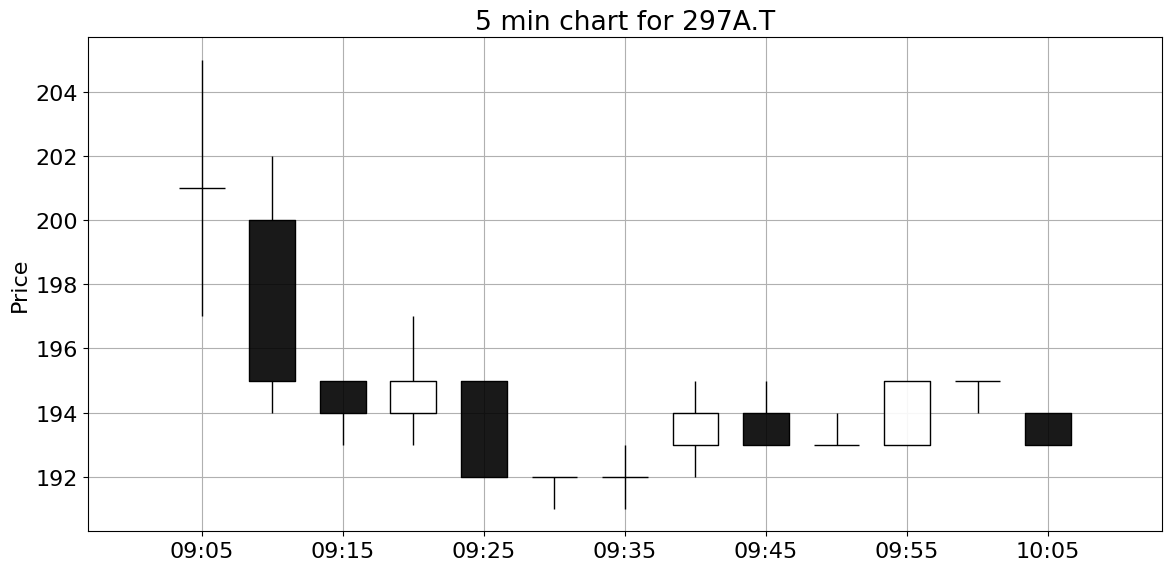

In [45]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=False,
    datetime_format='%H:%M',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('5 min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('5 min chart for %s' % symbol)

ax.grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('5min_chart_%s.png' % m.group(1))
else:
    plt.savefig('5min_chart_%s.png' % symbol)

plt.show()

In [42]:
df.tail(2)['Close']

Datetime
2024-12-25 10:00:00+09:00    195.0
2024-12-25 10:05:00+09:00    193.0
Name: Close, dtype: float64

In [43]:
df.tail(2)['Close'].diff()

Datetime
2024-12-25 10:00:00+09:00    NaN
2024-12-25 10:05:00+09:00   -2.0
Name: Close, dtype: float64